**Assignment on Decision Tree Classifier:**

A dataset collected in a cosmetics shop showing details of customers and whether they responded  to  a  special  offer  to  buy  a  new  lipstick  is  shown  in  table below. Use this dataset  to  build  a  decision  tree,  with  Buys  as  the  target  variable,  to  help  in buying lipsticks in the future. Find the root node of decision tree. According to the decision tree you have made from previous training data set, what is the decision for the test data: [Age < 21,Income = Low, Gender = Female, Marital Status = Married]?
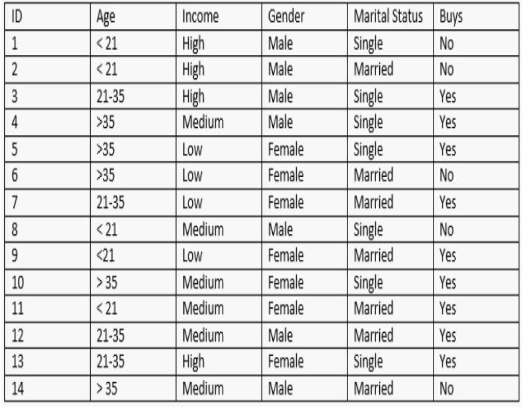

In [ ]:
import numpy as np
import pandas as pd
from numpy import log2 as log
eps = np.finfo(float).eps

In [ ]:
dataset = {
'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [ ]:
df = pd.DataFrame(dataset,columns=['Id','Age','Income','Gender','MaritalStatus','Buys'])
df

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [ ]:
df = df.drop('Id',axis=1)
df1 = df
df

,Age,Income,Gender,MaritalStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [ ]:
df.describe()

,Age,Income,Gender,MaritalStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Female,Married,Yes
freq,5,6,7,7,9


In [ ]:
#entropy is measure of disorder or uncertainity 
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [ ]:
#Find entropy of the attribute (Each Columns)
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

In [ ]:
# Find the Root Node
def find_winner(df):
    Entropy_att = []
    #Information Gain(IG) - measure the reduction of disorder in our target variable given additional feature info 
    IG = []
    for key in df.keys()[:-1]:
#Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]

In [ ]:
# Find the leaf Nodes
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)

In [ ]:
# Build Tree
def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Buys'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [ ]:
tree = buildTree(df)
tree

{'Age': {'21-35': 'Yes',
  '<21': {'Gender': {'Female': 'Yes', 'Male': 'No'}},
  '>35': {'MaritalStatus': {'Married': 'No', 'Single': 'Yes'}}}}

In [ ]:
#algorithm to predict using this tree structure
def predict(inst,tree):
    #This function is used to predict for any input variable 
    
    #Recursively we go through the tree that we built earlier

    for nodes in tree.keys():        
        
        value = inst[nodes]
        tree = tree[nodes][value]
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
        
    return prediction

In [ ]:
data = {'Age':'<21','Income':'Low','Gender':'Female','MaritalStatus':'Married'}
data

{'Age': '<21', 'Gender': 'Female', 'Income': 'Low', 'MaritalStatus': 'Married'}

In [ ]:
Prediction = predict(data,tree)
Prediction

'Yes'

**Using Decision Tree Classifier**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
#data=data.apply(le.fit_transform)
x=df1.iloc[:,:-1] #-1 means don't take last column 
x=x.apply(le.fit_transform)
#find label with their encoded value
print("Age with encodd value :",list( zip(df1.iloc[:,0], x.iloc[:,0])))
print("\nIncome with encoded value :",list( zip(df1.iloc[:,1], x.iloc[:,1])))
print("\nGender with encoded value :",list( zip(df1.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus with encoded value :",list( zip(df1.iloc[:,3], x.iloc[:,3])))

Age with encodd value : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with encoded value : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with encoded value : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus with encoded value : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [ ]:
y=df1.iloc[:,-1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predict value for the given Expression
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]\n", test_x," is ",pred_y[0])

Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]
 [1 1 0 0]  is  Yes


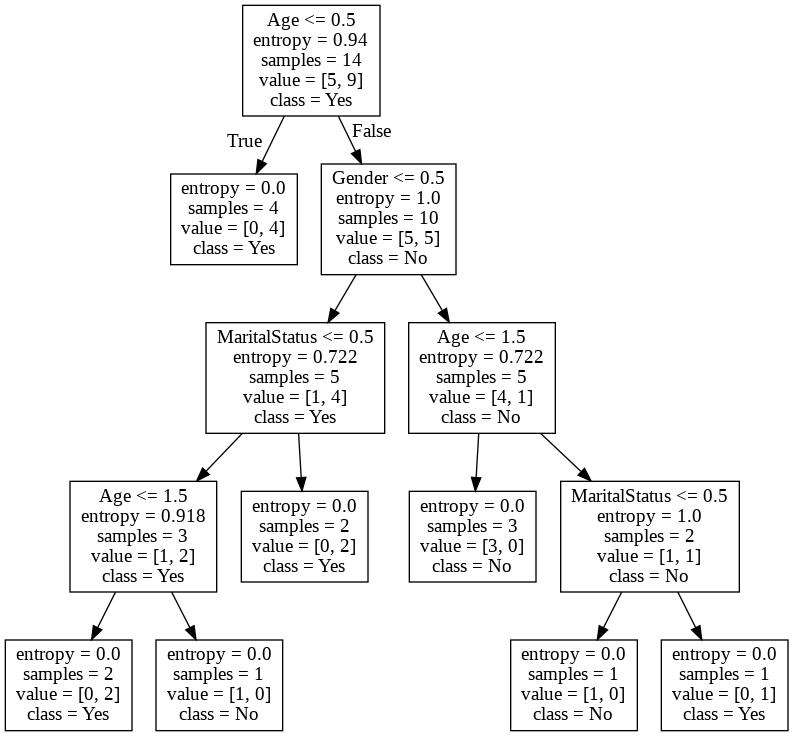

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(classifier,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
#you need to install graphviz in fedora(IN LAB) for running below dot command
#yum install graphviz

#then go to terminal and cd to directory where you are saving jupyter notebook
# and execute below command
#    dot -Tpng data.dot -o tree.png
  
    
!dot -Tpng data.dot -o tree.png
Image("tree.png")